In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
dataset=pd.read_csv(r"D:\dataset\manufacturing.csv")

In [155]:
dataset.head(3)

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758


In [156]:
dataset.shape

(3957, 6)

In [157]:
dataset.corr() #to check corelation

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
Temperature (°C),1.000000,-0.024754,0.571743,0.974901,0.971210,-0.461279
Pressure (kPa),-0.024754,1.000000,0.773572,0.151095,-0.022862,0.013129
Temperature x Pressure,0.571743,0.773572,1.000000,0.694733,0.555579,-0.258474
Material Fusion Metric,0.974901,0.151095,0.694733,1.000000,0.976708,-0.511972
Material Transformation Metric,0.971210,-0.022862,0.555579,0.976708,1.000000,-0.575756
Quality Rating,-0.461279,0.013129,-0.258474,-0.511972,-0.575756,1.000000


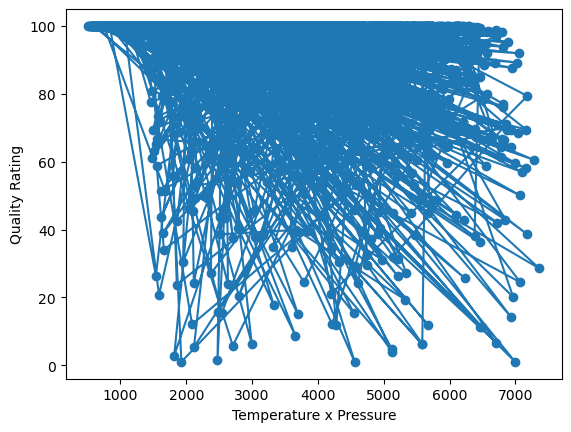

In [158]:
dataset.columns=dataset.columns.str.strip()
plt.scatter(dataset["Temperature x Pressure"],dataset["Quality Rating"])
plt.plot(dataset["Temperature x Pressure"],dataset["Quality Rating"])
plt.xlabel("Temperature x Pressure")
plt.ylabel("Quality Rating")
plt.show()

In [159]:
#convert polynomial
#y=ax+ax^2+ax^3+....+ax^n+c

In [160]:
X = dataset[["Temperature x Pressure"]]
y = dataset["Quality Rating"]

In [161]:
from sklearn.preprocessing import PolynomialFeatures

In [162]:
pf=PolynomialFeatures(degree=3) #pf is the object
pf.fit(x)
pf.transform(x)

array([[1.00000000e+00, 1.68876917e+03, 2.85194130e+06, 4.81627053e+09],
       [1.00000000e+00, 3.84293147e+03, 1.47681223e+07, 5.67528818e+10],
       [1.00000000e+00, 1.72982331e+03, 2.99228870e+06, 5.17613075e+09],
       ...,
       [1.00000000e+00, 3.95630467e+03, 1.56523467e+07, 6.19254522e+10],
       [1.00000000e+00, 4.97723476e+03, 2.47728659e+07, 1.23300369e+11],
       [1.00000000e+00, 3.97489712e+03, 1.57998071e+07, 6.28026078e+10]])

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=62)

In [165]:
from sklearn.linear_model import LinearRegression

In [166]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [167]:
lr.score(x_test,y_test)*100

5.6831906358376205

In [168]:
prd=lr.predict(x)

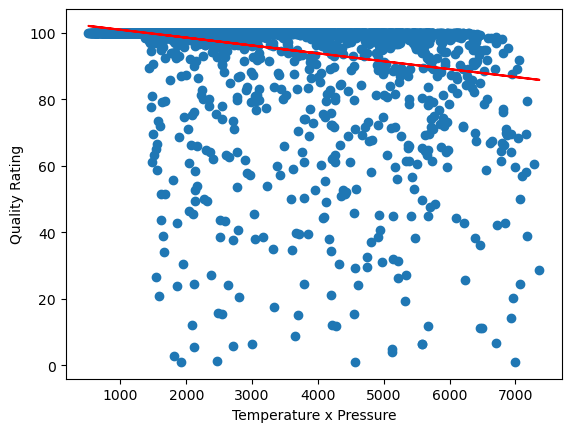

In [169]:
plt.scatter(dataset["Temperature x Pressure"],dataset["Quality Rating"])
plt.plot(dataset["Temperature x Pressure"],prd,c='red')
plt.xlabel("Temperature x Pressure")
plt.ylabel("Quality Rating")
plt.show()